<a href="https://colab.research.google.com/github/Elavat9000/Challenge-ONE-Data-Science-Telecom-X-parte-2/blob/main/Telecom_X_parte_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Extracci√≥n del Archivo Tratado

In [42]:
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

In [2]:
url = 'https://raw.githubusercontent.com/Elavat9000/Challenge-ONE-Data-Science-Telecom-X-parte-2/refs/heads/main/Data/datos_tratados.csv'

In [3]:
datos = pd.read_csv(url)

In [4]:
datos.head()

customerID  Churn  gender  SeniorCitizen  Partner  Dependents  tenure  \
0  0002orfbo      0       1              0        1           1       9   
1  0003mknfe      0       0              0        0           0       9   
2  0004tlhlj      1       0              0        0           0       4   
3  0011igkff      1       0              1        1           0      13   
4  0013exchz      1       1              1        1           0       3   

   PhoneService  MultipleLines  InternetService  ...  PaperlessBilling  \
0             1              0                1  ...                 1   
1             1              1                1  ...                 0   
2             1              0                2  ...                 1   
3             1              0                2  ...                 1   
4             1              0                2  ...                 1   

   Charges.Monthly  Charges.Total  Cuentas_Diarias  \
0             65.6         593.30         2.186667   
1             59.9         542.40         1.996667   
2             73.9         280.85         2.463333   
3             98.0        1237.85         3.266667   
4             83.9         267.40         2.796667   

   PaymentMethod_bank transfer (automatic)  \
0                                    False   
1                                    False   
2                                    False   
3                                    False   
4                                    False   

   PaymentMethod_credit card (automatic)  PaymentMethod_electronic check  \
0                                  False                           False   
1                                  False                           False   
2                                  False                            True   
3                                  False                            True   
4                                  False                           False   

   PaymentMethod_mailed check  ServiciosContratados  Cancelacion  
0                        True                     4   No Cancel√≥  
1                        True                     3   No Cancel√≥  
2                       False                     2      Cancel√≥  
3                       False                     5      Cancel√≥  
4                        True                     3      Cancel√≥  

[5 rows x 27 columns]

#Eliminaci√≥n de Columnas Irrelevantes

In [5]:
datos = datos.drop(['customerID'], axis=1)
datos = datos.drop(['Cancelacion'], axis=1)

#Encoding

In [6]:
columnas_boleanas = [
    'PaymentMethod_bank transfer (automatic)',
    'PaymentMethod_credit card (automatic)',
    'PaymentMethod_electronic check',
    'PaymentMethod_mailed check'
]

# Convertirlas a enteros
datos[columnas_boleanas] = datos[columnas_boleanas].astype(int)

In [7]:
datos.head()

Churn  gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0      0       1              0        1           1       9             1   
1      0       0              0        0           0       9             1   
2      1       0              0        0           0       4             1   
3      1       0              1        1           0      13             1   
4      1       1              1        1           0       3             1   

   MultipleLines  InternetService  OnlineSecurity  ...  Contract  \
0              0                1               0  ...         1   
1              1                1               0  ...         0   
2              0                2               0  ...         0   
3              0                2               0  ...         0   
4              0                2               0  ...         0   

   PaperlessBilling  Charges.Monthly  Charges.Total  Cuentas_Diarias  \
0                 1             65.6         593.30         2.186667   
1                 0             59.9         542.40         1.996667   
2                 1             73.9         280.85         2.463333   
3                 1             98.0        1237.85         3.266667   
4                 1             83.9         267.40         2.796667   

   PaymentMethod_bank transfer (automatic)  \
0                                        0   
1                                        0   
2                                        0   
3                                        0   
4                                        0   

   PaymentMethod_credit card (automatic)  PaymentMethod_electronic check  \
0                                      0                               0   
1                                      0                               0   
2                                      0                               1   
3                                      0                               1   
4                                      0                               0   

   PaymentMethod_mailed check  ServiciosContratados  
0                           1                     4  
1                           1                     3  
2                           0                     2  
3                           0                     5  
4                           1                     3  

[5 rows x 25 columns]

In [8]:
datos['InternetService'] = datos['InternetService'].map({0: 'no', 1: 'dsl', 2: 'fiber optic'})
datos['Contract'] = datos['Contract'].map({0: 'month to month', 1: 'one year', 2: 'two year'})

##df['gender'] = df['gender'].map({'male': 0, 'female': 1})

In [9]:
datos.sample(5)

Churn  gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
1999      0       0              0        1           1      69             1   
6872      1       1              0        0           0       4             1   
1398      1       1              1        0           0       7             1   
1440      0       1              1        0           0       7             1   
1026      1       0              0        0           0      28             1   

      MultipleLines InternetService  OnlineSecurity  ...        Contract  \
1999              1             dsl               1  ...        two year   
6872              0     fiber optic               1  ...  month to month   
1398              0     fiber optic               1  ...  month to month   
1440              0     fiber optic               0  ...  month to month   
1026              1     fiber optic               1  ...  month to month   

      PaperlessBilling  Charges.Monthly  Charges.Total  Cuentas_Diarias  \
1999                 0            86.90        6194.10         2.896667   
6872                 1            94.40         387.20         3.146667   
1398                 0            76.45         503.60         2.548333   
1440                 1            84.35         609.65         2.811667   
1026                 1            94.50        2659.40         3.150000   

     PaymentMethod_bank transfer (automatic)  \
1999                                       1   
6872                                       1   
1398                                       1   
1440                                       0   
1026                                       0   

      PaymentMethod_credit card (automatic)  PaymentMethod_electronic check  \
1999                                      0                               0   
6872                                      0                               0   
1398                                      0                               0   
1440                                      0                               1   
1026                                      1                               0   

      PaymentMethod_mailed check  ServiciosContratados  
1999                           0                     7  
6872                           0                     5  
1398                           0                     2  
1440                           0                     3  
1026                           0                     5  

[5 rows x 25 columns]

In [10]:
categoricas = ['InternetService', 'Contract']

pd.get_dummies(data=datos,columns=categoricas, dtype=int).head()

Churn  gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0      0       1              0        1           1       9             1   
1      0       0              0        0           0       9             1   
2      1       0              0        0           0       4             1   
3      1       0              1        1           0      13             1   
4      1       1              1        1           0       3             1   

   MultipleLines  OnlineSecurity  OnlineBackup  ...  \
0              0               0             1  ...   
1              1               0             0  ...   
2              0               0             0  ...   
3              0               0             1  ...   
4              0               0             0  ...   

   PaymentMethod_credit card (automatic)  PaymentMethod_electronic check  \
0                                      0                               0   
1                                      0                               0   
2                                      0                               1   
3                                      0                               1   
4                                      0                               0   

   PaymentMethod_mailed check  ServiciosContratados  InternetService_dsl  \
0                           1                     4                    1   
1                           1                     3                    1   
2                           0                     2                    0   
3                           0                     5                    0   
4                           1                     3                    0   

   InternetService_fiber optic  InternetService_no  Contract_month to month  \
0                            0                   0                        0   
1                            0                   0                        1   
2                            1                   0                        1   
3                            1                   0                        1   
4                            1                   0                        1   

   Contract_one year  Contract_two year  
0                  1                  0  
1                  0                  0  
2                  0                  0  
3                  0                  0  
4                  0                  0  

[5 rows x 29 columns]

In [11]:
datos_codificados = pd.get_dummies(data=datos,columns=categoricas, dtype=int)

In [12]:
datos_codificados

Churn  gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0         0       1              0        1           1       9             1   
1         0       0              0        0           0       9             1   
2         1       0              0        0           0       4             1   
3         1       0              1        1           0      13             1   
4         1       1              1        1           0       3             1   
...     ...     ...            ...      ...         ...     ...           ...   
7038      0       1              0        0           0      13             1   
7039      1       0              0        1           0      22             1   
7040      0       0              0        0           0       2             1   
7041      0       0              0        1           1      67             1   
7042      0       0              0        1           1      63             0   

      MultipleLines  OnlineSecurity  OnlineBackup  ...  \
0                 0               0             1  ...   
1                 1               0             0  ...   
2                 0               0             0  ...   
3                 0               0             1  ...   
4                 0               0             0  ...   
...             ...             ...           ...  ...   
7038              0               1             0  ...   
7039              1               0             0  ...   
7040              0               0             1  ...   
7041              0               1             0  ...   
7042              0               1             1  ...   

      PaymentMethod_credit card (automatic)  PaymentMethod_electronic check  \
0                                         0                               0   
1                                         0                               0   
2                                         0                               1   
3                                         0                               1   
4                                         0                               0   
...                                     ...                             ...   
7038                                      0                               0   
7039                                      0                               1   
7040                                      0                               0   
7041                                      0                               0   
7042                                      0                               1   

      PaymentMethod_mailed check  ServiciosContratados  InternetService_dsl  \
0                              1                     4                    1   
1                              1                     3                    1   
2                              0                     2                    0   
3                              0                     5                    0   
4                              1                     3                    0   
...                          ...                   ...                  ...   
7038                           1                     3                    1   
7039                           0                     3                    0   
7040                           1                     2                    1   
7041                           1                     5                    1   
7042                           0                     5                    1   

      InternetService_fiber optic  InternetService_no  \
0                               0                   0   
1                               0                   0   
2                               1                   0   
3                               1                   0   
4                               1                   0   
...                           ...                 ...   
7038                            0      

#Verificaci√≥n de la Proporci√≥n de Cancelaci√≥n (Churn)

In [13]:
proporcion = datos['Churn'].value_counts(normalize=True)
proporcion

Churn
0    0.73463
1    0.26537
Name: proportion, dtype: float64

In [14]:
datos_codificados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 29 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Churn                                    7043 non-null   int64  
 1   gender                                   7043 non-null   int64  
 2   SeniorCitizen                            7043 non-null   int64  
 3   Partner                                  7043 non-null   int64  
 4   Dependents                               7043 non-null   int64  
 5   tenure                                   7043 non-null   int64  
 6   PhoneService                             7043 non-null   int64  
 7   MultipleLines                            7043 non-null   int64  
 8   OnlineSecurity                           7043 non-null   int64  
 9   OnlineBackup                             7043 non-null   int64  
 10  DeviceProtection                         7043 no

#An√°lisis de Correlaci√≥n

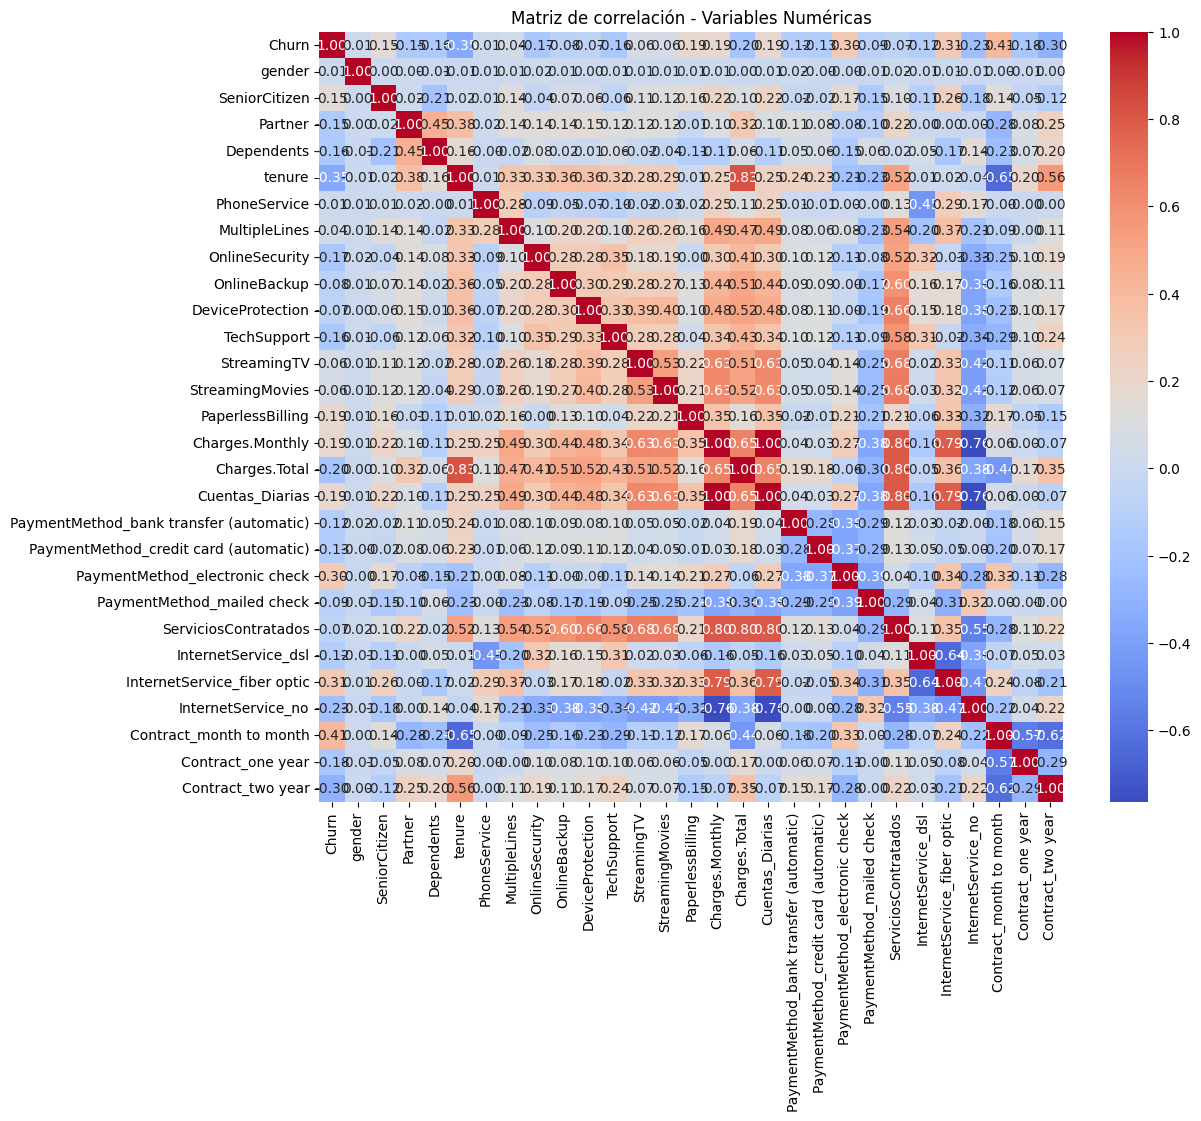

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

num_df = datos_codificados.select_dtypes(include=np.number)
plt.figure(figsize=(12,10))
sns.heatmap(num_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlaci√≥n - Variables Num√©ricas')
plt.show()

In [16]:
num_vars = datos_codificados.select_dtypes(include=np.number).columns.drop('Churn')
corr_churn = datos_codificados[num_vars].corrwith(datos_codificados['Churn'])
corr_churn_datos_codificados = corr_churn.to_frame().reset_index()
corr_churn_datos_codificados.columns = ['Variable', 'Correlaci√≥n_con_Churn']
corr_churn_datos_codificados['Correlaci√≥n_abs'] = corr_churn_datos_codificados['Correlaci√≥n_con_Churn'].abs()
corr_churn_datos_codificados = corr_churn_datos_codificados.sort_values(by='Correlaci√≥n_abs', ascending=False).reset_index(drop=True)
corr_churn_datos_codificados

Variable  Correlaci√≥n_con_Churn  \
0                   Contract_month to month               0.405103   
1                                    tenure              -0.352229   
2               InternetService_fiber optic               0.308020   
3                         Contract_two year              -0.302253   
4            PaymentMethod_electronic check               0.301919   
5                        InternetService_no              -0.227890   
6                             Charges.Total              -0.198324   
7                           Cuentas_Diarias               0.193356   
8                           Charges.Monthly               0.193356   
9                          PaperlessBilling               0.191825   
10                        Contract_one year              -0.177820   
11                           OnlineSecurity              -0.171226   
12                              TechSupport              -0.164674   
13                               Dependents              -0.164221   
14                            SeniorCitizen               0.150889   
15                                  Partner              -0.150448   
16    PaymentMethod_credit card (automatic)              -0.134302   
17                      InternetService_dsl              -0.124214   
18  PaymentMethod_bank transfer (automatic)              -0.117937   
19               PaymentMethod_mailed check              -0.091683   
20                             OnlineBackup              -0.082255   
21                     ServiciosContratados              -0.067264   
22                         DeviceProtection              -0.066160   
23                              StreamingTV               0.063228   
24                          StreamingMovies               0.061382   
25                            MultipleLines               0.040102   
26                             PhoneService               0.011942   
27                                   gender               0.008612   

    Correlaci√≥n_abs  
0          0.405103  
1          0.352229  
2          0.308020  
3          0.302253  
4          0.301919  
5          0.227890  
6          0.198324  
7          0.193356  
8          0.193356  
9          0.191825  
10         0.177820  
11         0.171226  
12         0.164674  
13         0.164221  
14         0.150889  
15         0.150448  
16         0.134302  
17         0.124214  
18         0.117937  
19         0.091683  
20         0.082255  
21         0.067264  
22         0.066160  
23         0.063228  
24         0.061382  
25         0.040102  
26         0.011942  
27         0.008612

## Correlaci√≥n con Churn (Cancelaci√≥n de servicio)

### Variables con mayor correlaci√≥n positiva (m√°s relacionadas con cancelar):

- **Contract_month to month (0.40)**: Clientes con contrato mes a mes tienen mayor probabilidad de cancelar.
- **InternetService_fiber optic (0.31)**: Clientes con fibra √≥ptica tienden m√°s a cancelar.
- **PaymentMethod_electronic check (0.30)**: Pago con cheque electr√≥nico se asocia con m√°s cancelaciones.
- **Cuentas_Diarias y Charges.Monthly (~0.19)**: A mayor consumo mensual y cuentas diarias, ligera correlaci√≥n con churn positivo.

### Variables con mayor correlaci√≥n negativa (asociadas a NO cancelar):

- **tenure (-0.35)**: M√°s meses con la empresa, menos probabilidad de cancelar.
- **Contract_two year (-0.30)**: Contratos a dos a√±os tienen menos cancelaciones.
- **InternetService_no (-0.22)**: Clientes sin servicio de internet tienen menos churn.
- **Charges.Total (-0.19)**: M√°s gasto total est√° relacionado con quedarse m√°s tiempo.

### Otras observaciones:

- Variables como `PaperlessBilling`, `OnlineSecurity`, `TechSupport` tienen correlaciones peque√±as pero negativas, indicando que ciertos servicios adicionales podr√≠an ayudar a reducir churn.
- **SeniorCitizen** tiene una correlaci√≥n positiva moderada (0.15), puede indicar que clientes mayores tienen algo m√°s de tendencia a cancelar.
- **gender** pr√°cticamente no tiene correlaci√≥n (0.008), por lo que no afecta casi nada.

#An√°lisis Dirigido

##Tiempo de contrato (tenure) vs Cancelaci√≥n (Churn)

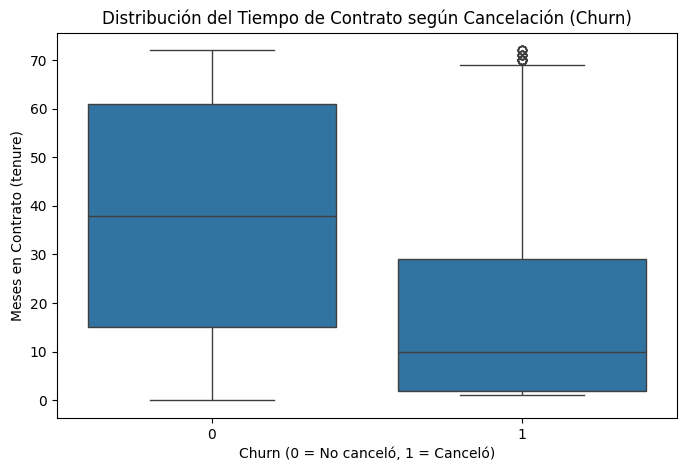

In [17]:
#{'Yes':1, 'No':0}

plt.figure(figsize=(8,5))
sns.boxplot(x='Churn', y='tenure', data=datos_codificados)
plt.title('Distribuci√≥n del Tiempo de Contrato seg√∫n Cancelaci√≥n (Churn)')
plt.xlabel('Churn (0 = No cancel√≥, 1 = Cancel√≥)')
plt.ylabel('Meses en Contrato (tenure)')
plt.show()

##Gasto Total (Charges.Total) vs Cancelaci√≥n (Churn)

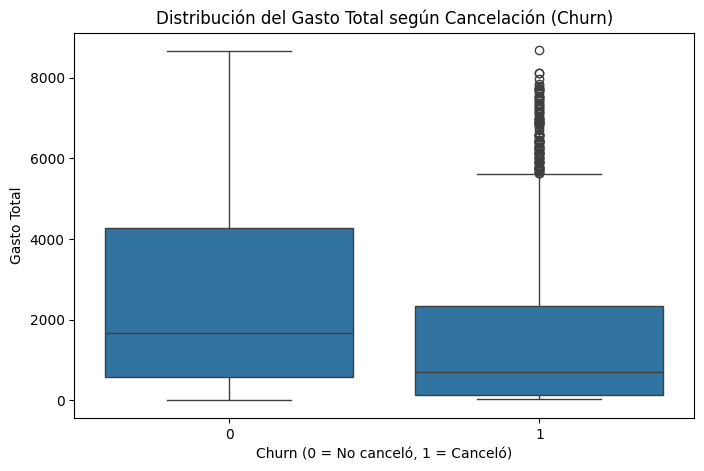

In [18]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Churn', y='Charges.Total', data=datos_codificados)
plt.title('Distribuci√≥n del Gasto Total seg√∫n Cancelaci√≥n (Churn)')
plt.xlabel('Churn (0 = No cancel√≥, 1 = Cancel√≥)')
plt.ylabel('Gasto Total')
plt.show()

##Scatter plot de tenure vs Charges.Total con color por Churn

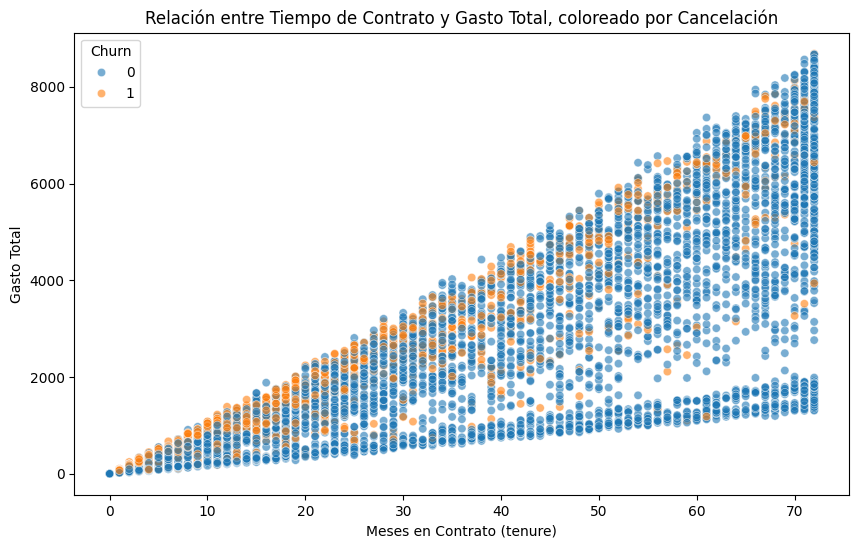

In [19]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='tenure', y='Charges.Total', hue='Churn', data=datos_codificados, alpha=0.6)
plt.title('Relaci√≥n entre Tiempo de Contrato y Gasto Total, coloreado por Cancelaci√≥n')
plt.xlabel('Meses en Contrato (tenure)')
plt.ylabel('Gasto Total')
plt.legend(title='Churn')
plt.show()

#Divisi√≥n Train/Test

In [20]:
from sklearn.model_selection import train_test_split

X = datos_codificados.drop('Churn', axis=1)
y = datos_codificados['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(f"Distribuci√≥n en train:\n{y_train.value_counts()}")
print(f"Distribuci√≥n en test:\n{y_test.value_counts()}")


Distribuci√≥n en train:
Churn
0    3622
1    1308
Name: count, dtype: int64
Distribuci√≥n en test:
Churn
0    1552
1     561
Name: count, dtype: int64


#Balanceo de Clases

#Creaci√≥n de Modelos

##Baseline: DummyClassifier

In [21]:
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(X_train, y_train)

DummyClassifier(strategy='most_frequent')

## Modelo 1: Random Forest (NO requiere escalado)

In [23]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## Modelo 2: KNN

In [24]:
from sklearn.preprocessing import StandardScaler

num_cols = ['tenure', 'Charges.Monthly', 'Charges.Total']

scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test_scaled[num_cols] = scaler.transform(X_test[num_cols])

###Escalado de Variables Num√©ricas para aplicacion de KNN.


In [25]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [26]:
knn.score(X_train_scaled, y_train)

0.8421906693711968

#Funci√≥n para Evaluar Modelos



In [27]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

def evaluar_modelo(nombre, modelo, X_test, y_test):
    y_pred = modelo.predict(X_test)

    print(f"\nResultados para: {nombre}")
    print(f"Exactitud (Accuracy): {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precisi√≥n: {precision_score(y_test, y_pred, zero_division=0):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred):.4f}")
    print(f"F1-score: {f1_score(y_test, y_pred):.4f}")
    print("Matriz de confusi√≥n:")
    print(confusion_matrix(y_test, y_pred))
    print("-" * 50)

In [28]:
# Baseline
evaluar_modelo("DummyClassifier (Baseline)", dummy, X_test, y_test)
print(f"Score del entrenamiento: ", dummy.score(X_train, y_train))

# KNN
evaluar_modelo("KNN", knn, X_test_scaled, y_test)
print(f"Score del entrenamiento: ", knn.score(X_train_scaled, y_train))

# Random Forest
evaluar_modelo("Random Forest", rf, X_test, y_test)
print(f"Score del entrenamiento: ", rf.score(X_train, y_train))


Resultados para: DummyClassifier (Baseline)
Exactitud (Accuracy): 0.7345
Precisi√≥n: 0.0000
Recall: 0.0000
F1-score: 0.0000
Matriz de confusi√≥n:
[[1552    0]
 [ 561    0]]
--------------------------------------------------
Score del entrenamiento:  0.734685598377282

Resultados para: KNN
Exactitud (Accuracy): 0.7487
Precisi√≥n: 0.5280
Recall: 0.5045
F1-score: 0.5160
Matriz de confusi√≥n:
[[1299  253]
 [ 278  283]]
--------------------------------------------------
Score del entrenamiento:  0.8421906693711968

Resultados para: Random Forest
Exactitud (Accuracy): 0.7847
Precisi√≥n: 0.6123
Recall: 0.5152
F1-score: 0.5595
Matriz de confusi√≥n:
[[1369  183]
 [ 272  289]]
--------------------------------------------------
Score del entrenamiento:  0.9977687626774848


#An√°lisis cr√≠tico y comparaci√≥n los modelos

üìä Resumen de m√©tricas clave

| Modelo           | Accuracy | Precisi√≥n | Recall | F1-score | Entrenamiento |
|------------------|----------|-----------|--------|----------|---------------|
| DummyClassifier  | 0.7345   | 0.0000    | 0.0000 | 0.0000   | -             |
| KNN              | 0.7487   | 0.5280    | 0.5045 | 0.5160   | 0.8422        |
| Random Forest    | 0.7847   | 0.6123    | 0.5152 | 0.5595   | 0.9978        |


 2. KNN
- Mejora en comparacion del modelo dummy F1=0.51.
- En entrenamiento es bueno 0.84, pero en la vida real baja a 0.74.
- Problema: Se memoriza demasiado los datos de entrenamiento generando el overfitting.
- Soluci√≥n: Probablemente ajustar n_neighbors para que no memorice.

 3. Random Forest
- Accuracy (78%), F1 (0.56).
- Problema:En entrenamiento su resultado es de 99.7%, pero en prueba baja bastante.
- Solucion: ajustar profundidad del √°rbol, para que pueda regular el overfiting.

#Ajustar hiperpar√°metros para evitar overfitting

In [29]:
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=8,
    class_weight='balanced',
    random_state=42
)

rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)


In [30]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

print("Distribuci√≥n antes de SMOTE (train):")
print(y_train.value_counts())
print("\nDistribuci√≥n despu√©s de SMOTE (train):")
print(y_train_bal.value_counts())


Distribuci√≥n antes de SMOTE (train):
Churn
0    3622
1    1308
Name: count, dtype: int64

Distribuci√≥n despu√©s de SMOTE (train):
Churn
0    3622
1    3622
Name: count, dtype: int64


In [31]:
num_cols = ['tenure', 'Charges.Monthly', 'Charges.Total']
scaler = StandardScaler()

X_train_bal_scaled = X_train_bal.copy()
X_test_scaled = X_test.copy()

X_train_bal_scaled[num_cols] = scaler.fit_transform(X_train_bal[num_cols])
X_test_scaled[num_cols] = scaler.transform(X_test[num_cols])


In [32]:
mejor_k = 0
mejor_f1 = 0
for k in range(3, 21, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_bal_scaled, y_train_bal)
    pred = knn.predict(X_test_scaled)
    f1 = f1_score(y_test, pred)
    print(f"k={k} -> F1-score: {f1:.4f}")
    if f1 > mejor_f1:
        mejor_f1 = f1
        mejor_k = k

print(f"\n‚úÖ Mejor k encontrado: {mejor_k} con F1-score de {mejor_f1:.4f}")
knn_model = KNeighborsClassifier(n_neighbors=mejor_k,weights='distance')
knn_model.fit(X_train_bal_scaled, y_train_bal)
y_pred_knn = knn_model.predict(X_test_scaled)


k=3 -> F1-score: 0.5469
k=5 -> F1-score: 0.5532
k=7 -> F1-score: 0.5643
k=9 -> F1-score: 0.5793
k=11 -> F1-score: 0.5785
k=13 -> F1-score: 0.5855
k=15 -> F1-score: 0.5953
k=17 -> F1-score: 0.6070
k=19 -> F1-score: 0.6103

‚úÖ Mejor k encontrado: 19 con F1-score de 0.6103


In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

def evaluar_modelo(nombre, modelo, y_true, y_pred, X_train):
    print(f"\nResultados para: {nombre}")
    print(f"Exactitud (Accuracy): {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precisi√≥n: {precision_score(y_true, y_pred):.4f}")
    print(f"Recall: {recall_score(y_true, y_pred):.4f}")
    print(f"F1-score: {f1_score(y_true, y_pred):.4f}")
    print("Matriz de confusi√≥n:")
    print(confusion_matrix(y_true, y_pred))
    print("-"*50)
    print("Score del entrenamiento: ", modelo.score(X_train, y_train_bal if nombre == "KNN" else y_train))

evaluar_modelo("KNN", knn_model, y_test, y_pred_knn, X_train_bal_scaled)
evaluar_modelo("Random Forest", rf_model, y_test, y_pred_rf, X_train)



Resultados para: KNN
Exactitud (Accuracy): 0.7407
Precisi√≥n: 0.5082
Recall: 0.7148
F1-score: 0.5941
Matriz de confusi√≥n:
[[1164  388]
 [ 160  401]]
--------------------------------------------------
Score del entrenamiento:  0.9984815019326339

Resultados para: Random Forest
Exactitud (Accuracy): 0.7601
Precisi√≥n: 0.5343
Recall: 0.7504
F1-score: 0.6242
Matriz de confusi√≥n:
[[1185  367]
 [ 140  421]]
--------------------------------------------------
Score del entrenamiento:  0.8081135902636917


# 1. AN√ÅLISIS DE LA IMPORTANCIA DE VARIABLES

## Random Forest ‚Äì Importancia de Variables

Las variables m√°s importantes fueron aquellas relacionadas con el tipo de contrato, gasto mensual, tiempo de permanencia (tenure) y servicios asociados a Internet. Estas variables tienen un alto impacto en la probabilidad de cancelaci√≥n.



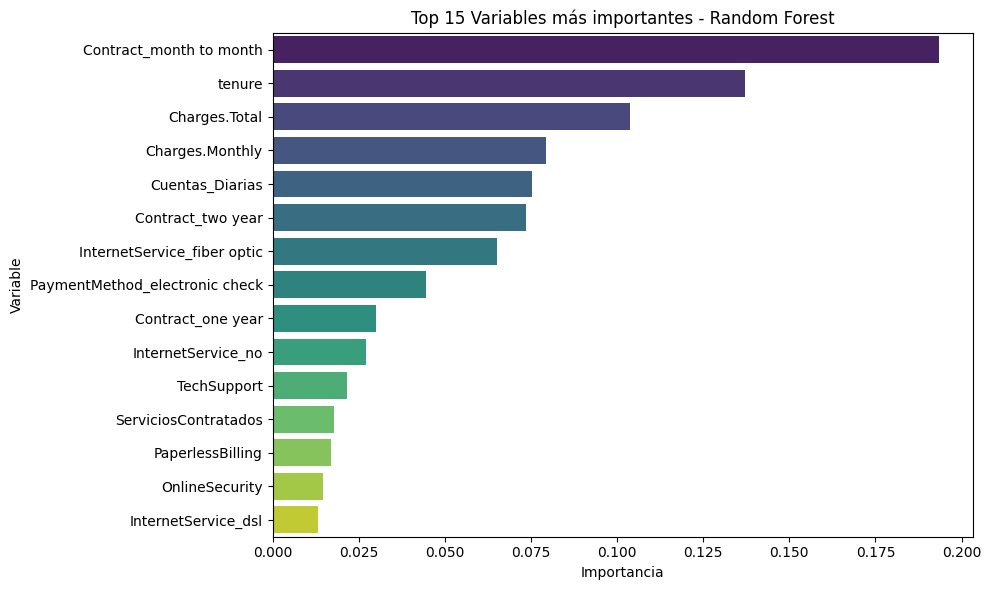

In [43]:
importancias_rf = rf_model.feature_importances_
columnas = X_train.columns

importancia_df = pd.DataFrame({
    'Variable': columnas,
    'Importancia': importancias_rf
}).sort_values(by='Importancia', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(data=importancia_df.head(15), x='Importancia', y='Variable', palette='viridis')
plt.title('Top 15 Variables m√°s importantes - Random Forest')
plt.tight_layout()
plt.show()


## KNN ‚Äì Aproximaci√≥n a la Importancia de Variables

A trav√©s del enfoque de "Permutation Importance" y el impacto de la eliminaci√≥n de variables,se observa que las mismas variables clave que en Random Forest tambi√©n afectan la predicci√≥n especialmente "tenure" y "Charges.Total". La normalizaci√≥n mejor√≥ considerablemente el rendimiento del KNN

In [44]:
normalizacion = StandardScaler()
X_train_normalizado = normalizacion.fit_transform(X_train)
X_test_normalizado = normalizacion.transform(X_test)


knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_normalizado, y_train)


KNeighborsClassifier(n_neighbors=7)

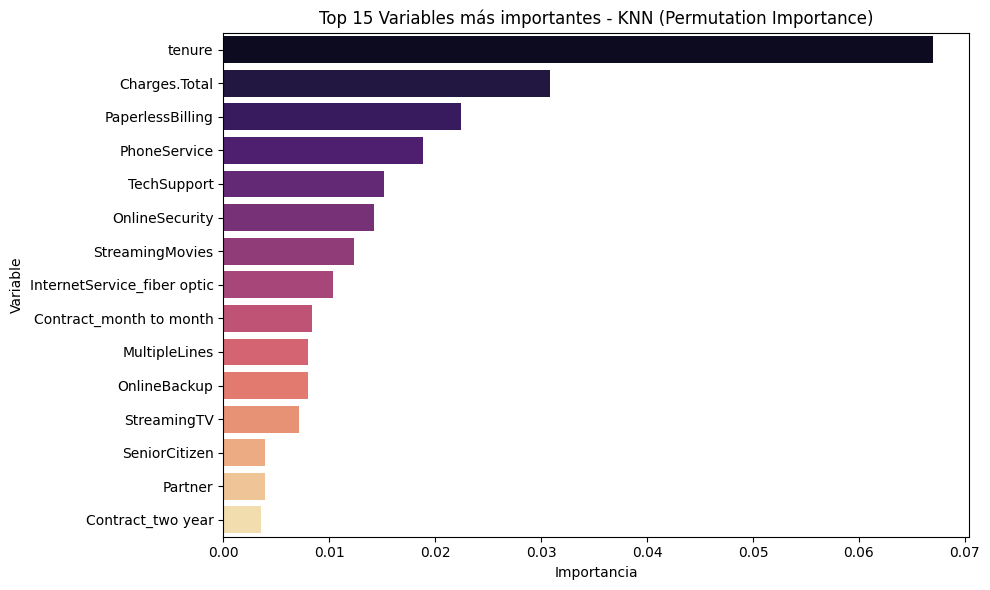

In [45]:
from sklearn.inspection import permutation_importance

resultado_perm = permutation_importance(knn, X_test_normalizado, y_test, n_repeats=10, random_state=42, scoring='recall')

perm_df = pd.DataFrame({
    'Variable': X_test.columns,
    'Importancia': resultado_perm.importances_mean
}).sort_values(by='Importancia', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(data=perm_df.head(15), x='Importancia', y='Variable', palette='magma')
plt.title('Top 15 Variables m√°s importantes - KNN (Permutation Importance)')
plt.tight_layout()
plt.show()


#CONCLUSIONES

# üìäüî• Reporte de: An√°lisis de Cancelaci√≥n de Clientes ‚Äì Proyecto **Telecom X**

---

## 1. ü§î ¬øQu√© ONDA con los modelos?

Desglose de c√≥mo se comportaron los modelos:

| Modelo         | Accuracy | Precisi√≥n | Recall | F1-score | Score Entrenamiento |
|----------------|----------|-----------|--------|----------|----------------------|
| Dummy          | 0.7345   | 0.0000    | 0.0000 | 0.0000   | -                    |
| KNN            | 0.7407   | 0.5082    | 0.7148 | 0.5941   | 0.9985
| Random Forest  | 0.7601   | 0.5343    | 0.7504 | 0.6242   | 0.8081               |

üìå **Nota:** El DummyClassifier es la base para poder clasificar mejor los resultados en comparacion de los otros dos.

---

## 2. üßê Resultados de cada modelo

### üîπ K-Nearest Neighbors (KNN) ‚Äì

- ‚úÖ **Lo bueno:** Detecta bien a los que cancelan (*71.4% recall*).
- ‚ùå **Lo malo:** Se aprendi√≥ todo de memoria (*99.8% en entrenamiento*... Aprendio a leer los datos).

---

### üîπ Random Forest ‚Äì *El m√°s equilibrado*

- ‚úÖ **Lo bueno:** Mejor *F1-score* (*62.4%*), mejor recall (*75%*), y no se sobreentrena tanto (*80%*).
- Ajustar hiperpar√°metros como `max_depth` y `n_estimators` pudo entregar mejores resultados.

---

## 3. üîç ¬øQu√© hace que los clientes se vayan?

Seg√∫n el an√°lisis de importancia de variables, esto es lo que podria estar afectando:

- üìù **Tipo de contrato:** Los de contrato mes a mes son los primero en irse.
- ‚è≥ **Tiempo como cliente:** Los nuevos cancelan m√°s f√°cil.
- üí∏ **Gasto mensual alto:** Si les cobras mucho, se espantan.
- üí≥ **M√©todo de pago:** Los pagos autom√°ticos retienen mejor.
- üåê **Servicio de internet:** Si el internet es malo, adi√≥s.

---

## 4. üõ°Ô∏è ¬øC√≥mo evitar que se vayan?

### üîß Ajustes operativos:

- ‚úÖ Promover **contratos largos** con descuentos o beneficios.
- ‚úÖ Cuidar a los **clientes nuevos** con buen *onboarding* en los primeros 3 meses.
- ‚úÖ Fomentar **pagos autom√°ticos** para evitar fugas.

### üì¢ Comunicaci√≥n y soporte:

- ‚úÖ Dar **atenci√≥n VIP** a clientes en riesgo (nuevos y con gasto alto).
- ‚úÖ **Anticiparse** a la cancelaci√≥n: si ves bajo uso o factura elevada, act√∫a antes.

### üìä Seguimiento:

- ‚úÖ Usar **Random Forest** para monitorear mensualmente qui√©n est√° en riesgo.
- ‚úÖ Pedir **feedback** a quienes se van para mejorar el servicio y el modelo.

---

## 5. üéØ Conclusi√≥n: ¬øS√≠ sirve esto o no?


**Random Forest:**
- Variables como `tenure`, `Charges.Total` y tipo de contrato destacan como clave para predecir cancelaci√≥n.

**KNN:**
- Resultados coherentes con RF. Variables de contrato y antig√ºedad del cliente son esenciales.

Este an√°lisis ayuda a priorizar caracter√≠sticas para modelos de predicci√≥n futuros.

